## Goals

Primary goal is to maximize True Precision.  Secondary goal is to maximize True Recall.  We first want to be right about the players we mark as successful, then we'll worry about identifying as many of the successes as possible.

Want to maximize the ratio of the lower-right over the upper right quadrant of the confusion matrix - the number of players predicted successed who actually are successes

$$\frac{true\ positives}{true\ positives\ +\ false\ positives}$$

## Imports & Info

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

# sklearn imports
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

test_file_url = '~/Documents/Data Science/Data Projects/nfl_db/sausage_factory/TESTING_nfl+ncaa_scaled.csv'
# set random_state SEED variable
SEED = 42

In [2]:
from matplotlib import rcParams
import matplotlib as mpl

#svg.fonttype: path

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

#rcParams['axes.prop_cycle'] = cycler('color', [blue, gray, red, dark_gray, green, purple])

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (15, 9),
       dpi= 200,
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

In [3]:
df = pd.read_csv(test_file_url, index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6050
Data columns (total 28 columns):
height            6051 non-null float64
weight            6051 non-null float64
ncaa_yr_ct        6051 non-null float64
games             6051 non-null float64
tackles_solo      6051 non-null float64
tackles_asst      6051 non-null float64
tfl_solo          6051 non-null float64
tfl_asst          6051 non-null float64
tfl_yards         6051 non-null float64
sacks_solo        6051 non-null float64
sacks_asst        6051 non-null float64
sacks_yards       6051 non-null float64
int               6051 non-null float64
int_yards         6051 non-null float64
int_td            6051 non-null float64
fum               6051 non-null float64
fum_yards         6051 non-null float64
fum_td            6051 non-null float64
ffum              6051 non-null float64
safety            6051 non-null float64
punt_ret          6051 non-null float64
punt_ret_yards    6051 non-null float64
punt_ret_td  

In [4]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# training set breakdown
train_success = y_train.sum()
train_total = len(y_train)
train_percent = train_success / train_total
print('Training Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n'.format(train_success, train_total, train_percent))

# test set breakdown
test_success = y_test.sum()
test_total = len(y_test)
test_percent = test_success / test_total
print('Test Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n\n'.format(test_success, test_total, test_percent))

Training Set
Successes:	196
Total:		4235
Percent:	0.046

Test Set
Successes:	100
Total:		1816
Percent:	0.055




Class 0: 5755
Class 1: 296
Proportion: 19.0 : 1


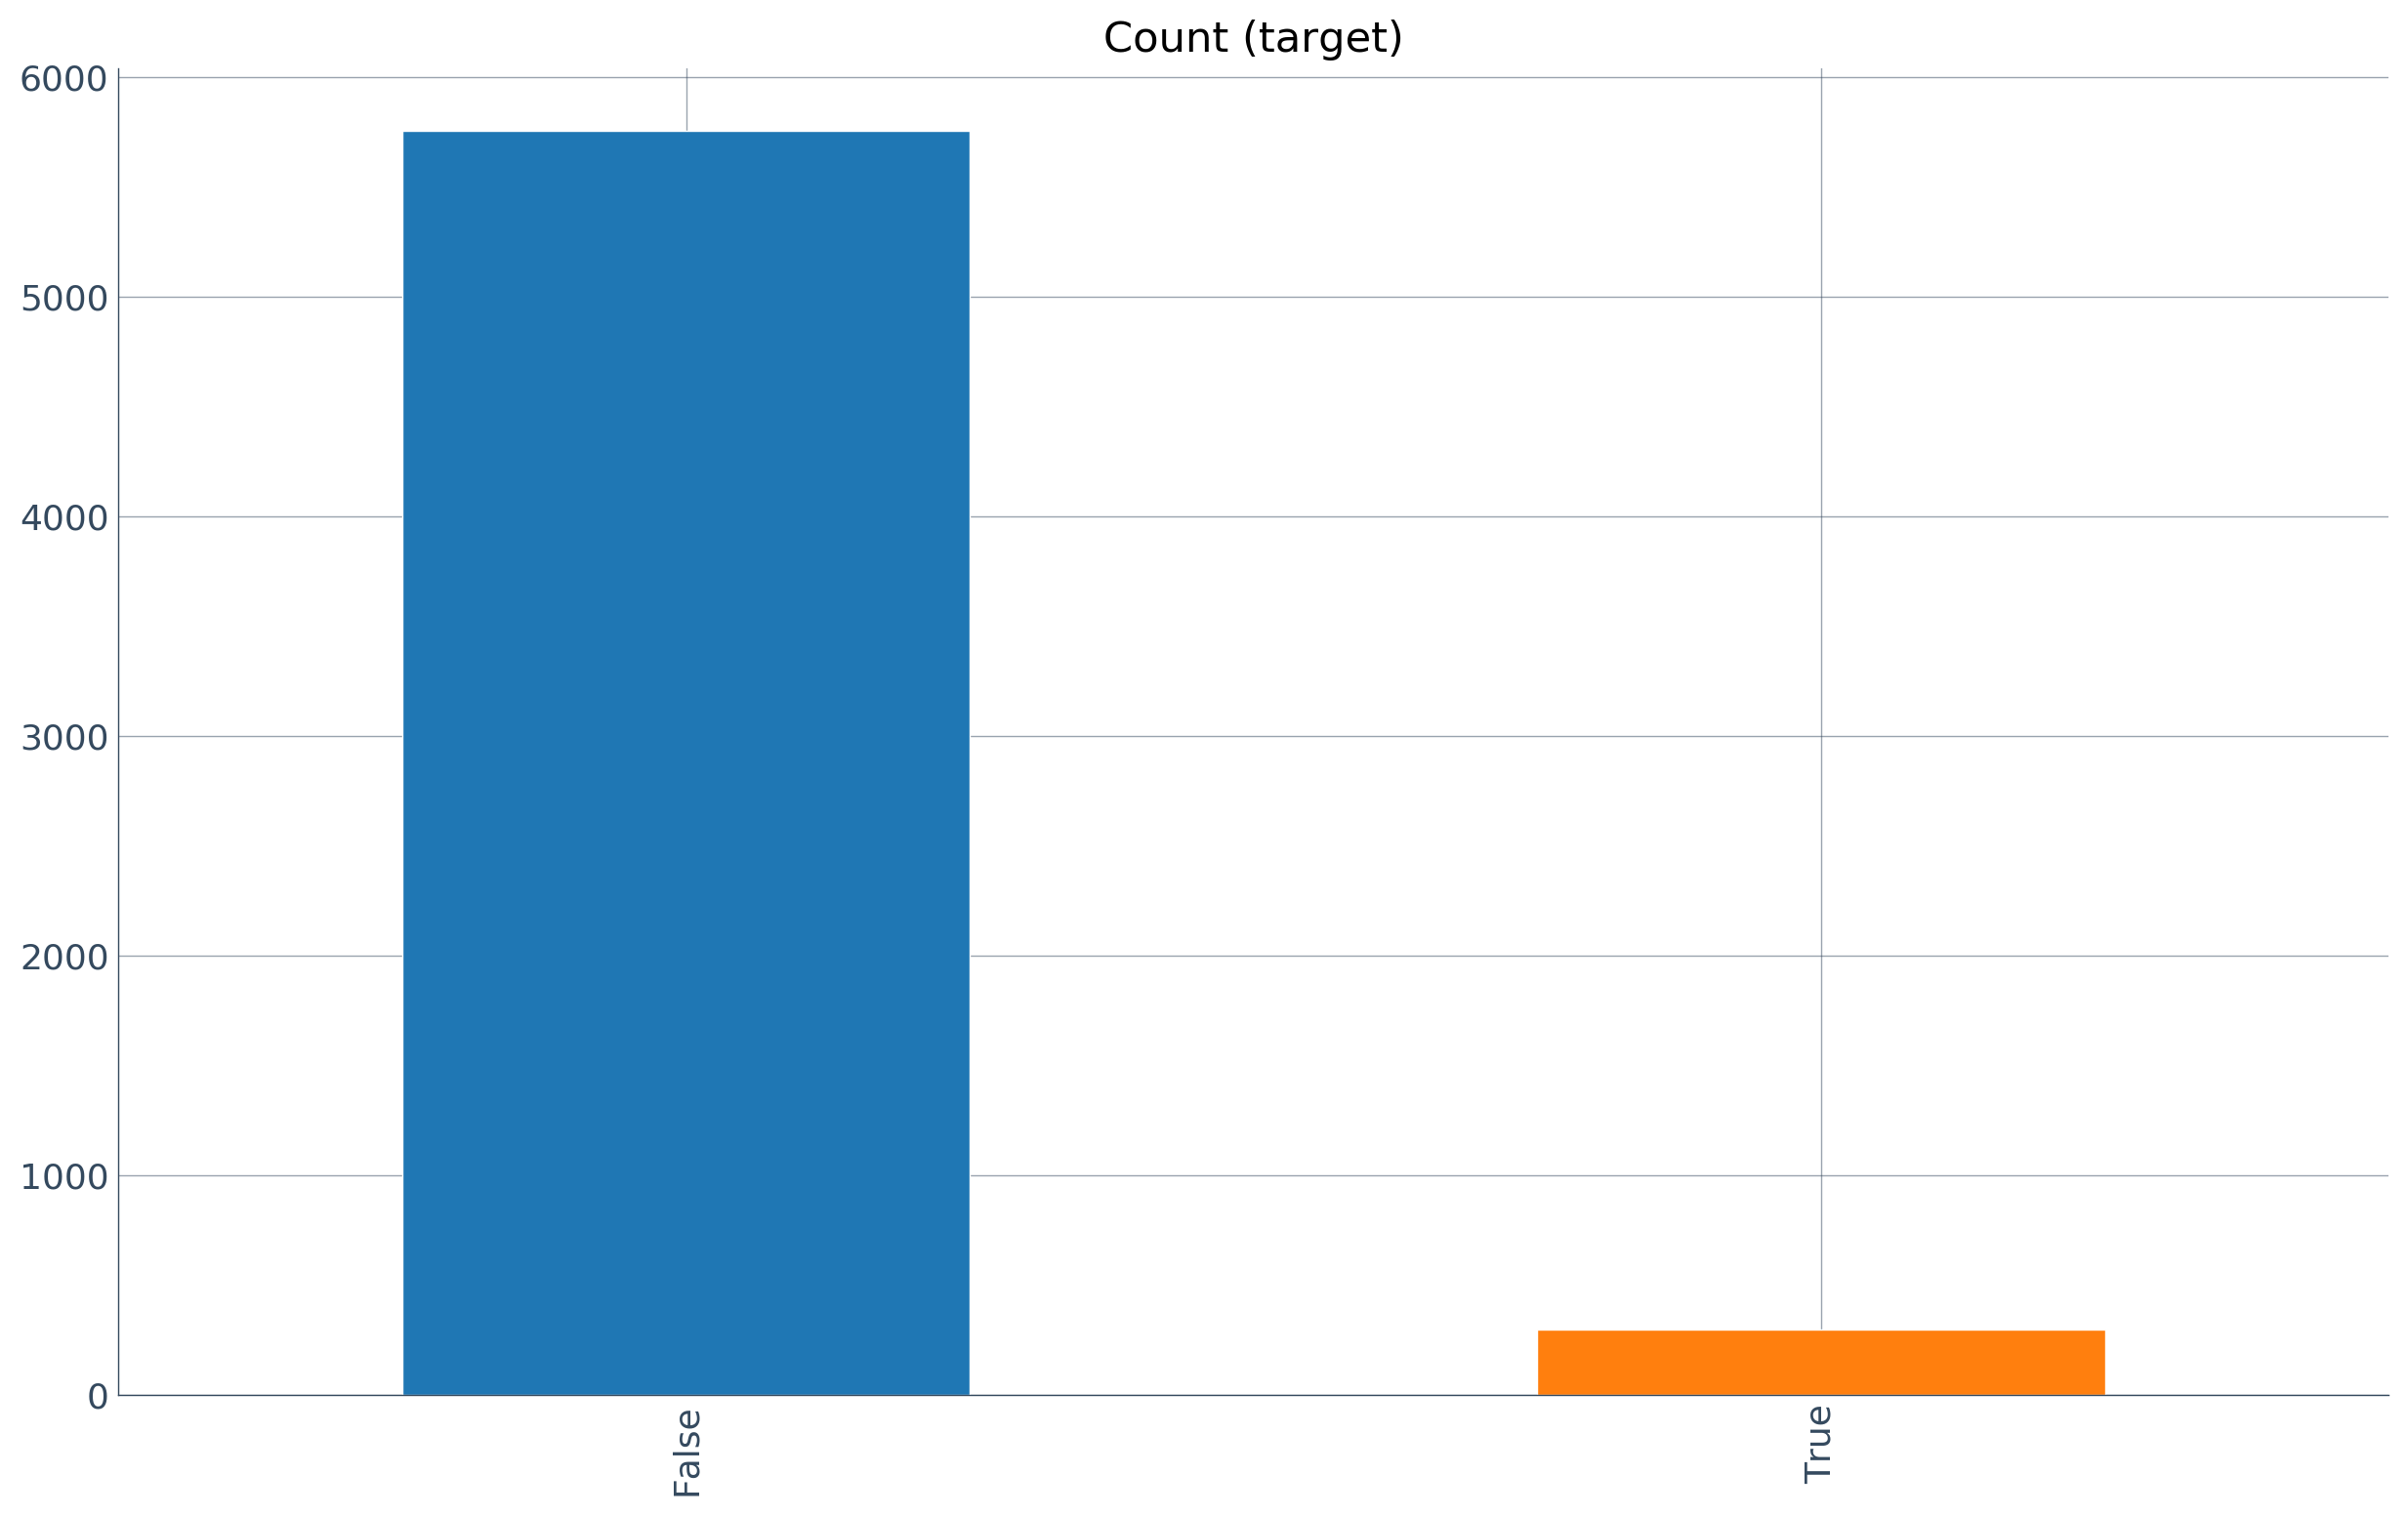

In [5]:
target_count = df.success.value_counts()
print('Class 0: {}'.format(target_count[0]))
print('Class 1: {}'.format(target_count[1]))
print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')

target_count.plot(kind='bar', title = 'Count (target)');

In [6]:
from imblearn.over_sampling import SMOTE

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# training set breakdown
train_success = y_train_sm.sum()
train_total = len(y_train_sm)
train_percent = train_success / train_total
print('Training Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n'.format(train_success, train_total, train_percent))

# test set breakdown
test_success = y_test.sum()
test_total = len(y_test)
test_percent = test_success / test_total
print('Test Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n\n'.format(test_success, test_total, test_percent))

Training Set
Successes:	4039
Total:		8078
Percent:	0.500

Test Set
Successes:	100
Total:		1816
Percent:	0.055




## Dummy Classifier

Dummy Classifier accuracy: 0.9025


             precision    recall  f1-score   support

      False       0.95      0.95      0.95      1716
       True       0.07      0.06      0.06       100

avg / total       0.90      0.90      0.90      1816



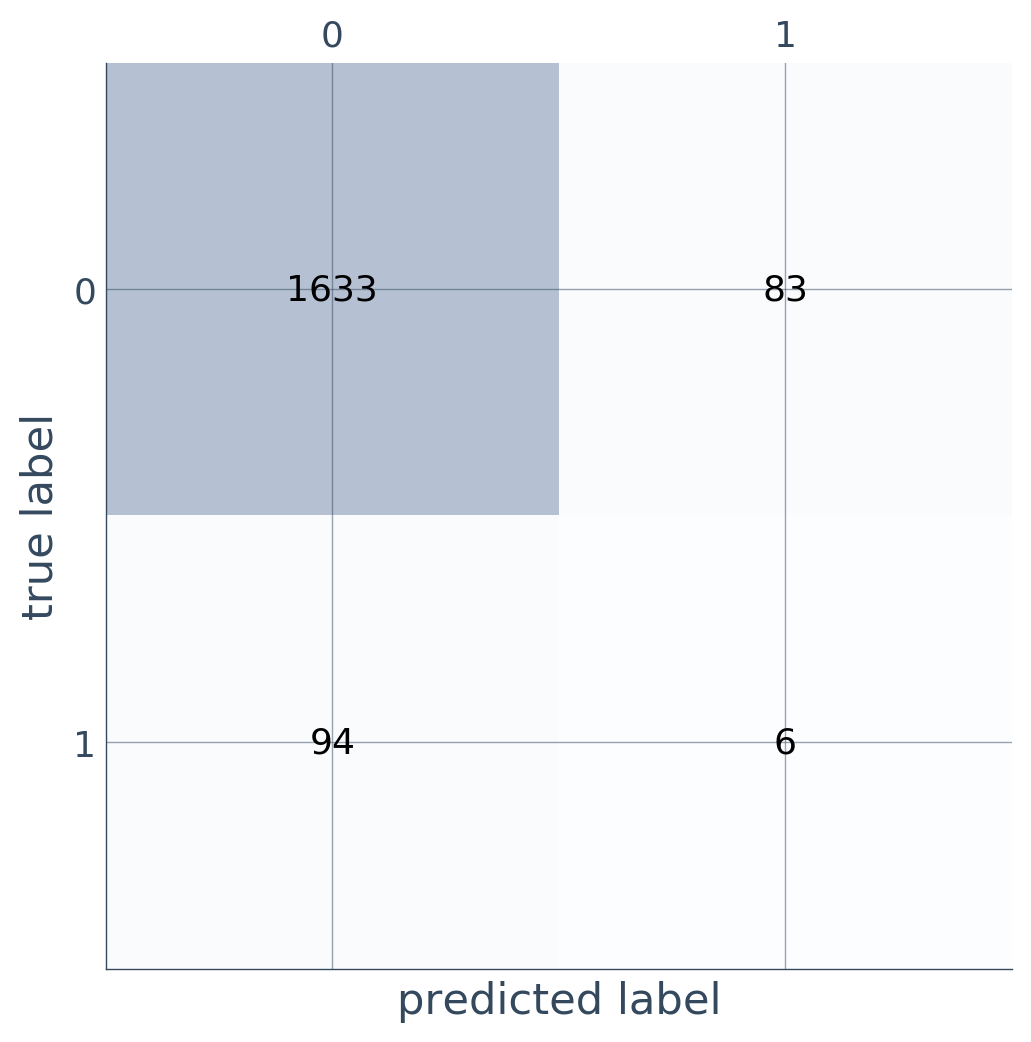

In [7]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)


# instantiate and fit a dummy classifier
dummy = DummyClassifier(random_state = SEED)
dummy.fit(X_train, y_train)

# make predictions
y_pred = dummy.predict(X_test)

# SCORING
# accuracy
dummy_accuracy = dummy.score(X_test, y_test)
print('Dummy Classifier accuracy: {:.4f}\n\n'.format(dummy_accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Dummy Classifier - standardized & SMOTEd

Dummy Classifier accuracy: 0.5055


Precision: 0.0576
             precision    recall  f1-score   support

      False       0.95      0.50      0.66      1716
       True       0.06      0.52      0.10       100

avg / total       0.90      0.51      0.63      1816



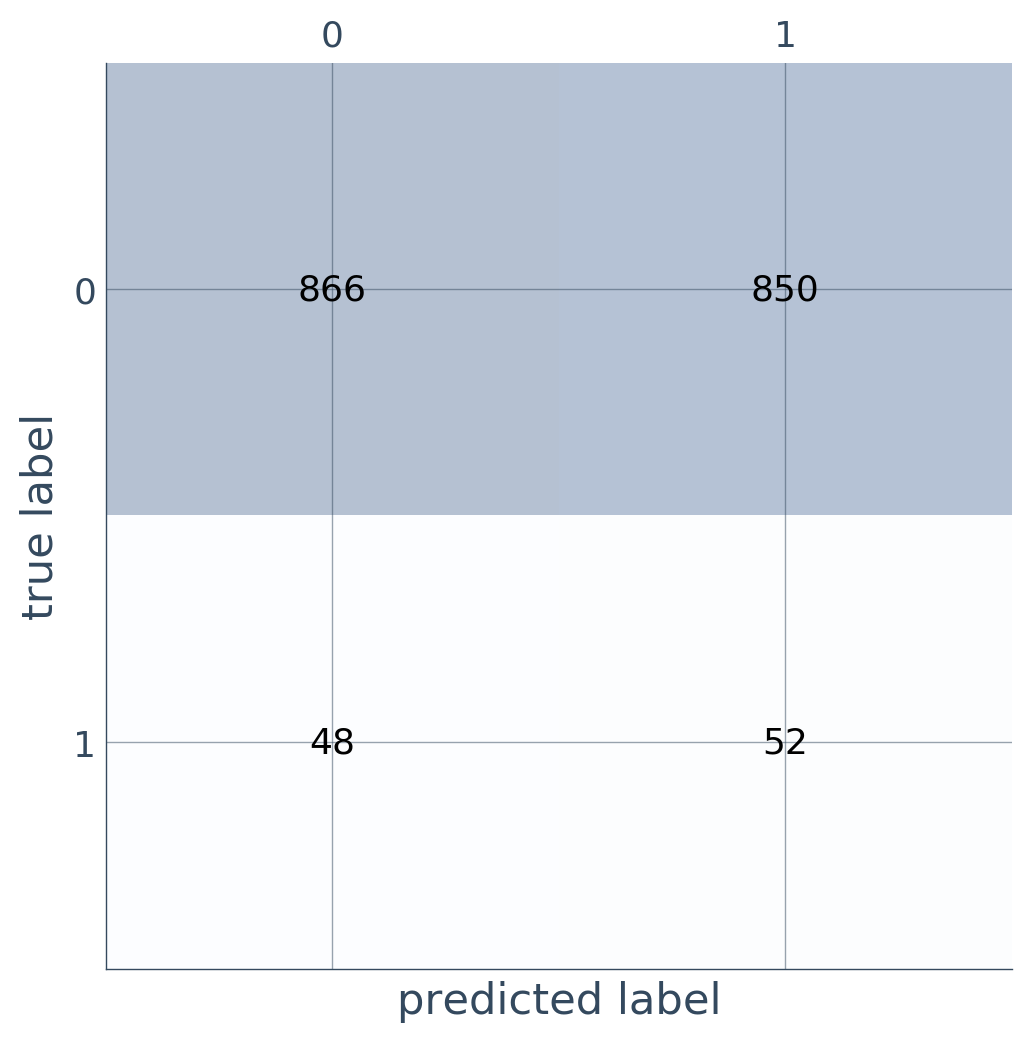

In [8]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate and fit a dummy classifier
dummy = DummyClassifier(random_state = SEED)
dummy.fit(X_train_sm, y_train_sm)

# make predictions
y_pred = dummy.predict(X_test)

# SCORING
# accuracy
dummy_accuracy = dummy.score(X_test, y_test)
print('Dummy Classifier accuracy: {:.4f}\n\n'.format(dummy_accuracy))

# precision
precision = precision_score(y_test, y_pred)
print('Precision: {:.4f}'.format(precision))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## Logistic Regression

Logistic Regression Accuracy:	0.8403

             precision    recall  f1-score   support

      False       0.99      0.84      0.91      1716
       True       0.23      0.84      0.37       100

avg / total       0.95      0.84      0.88      1816



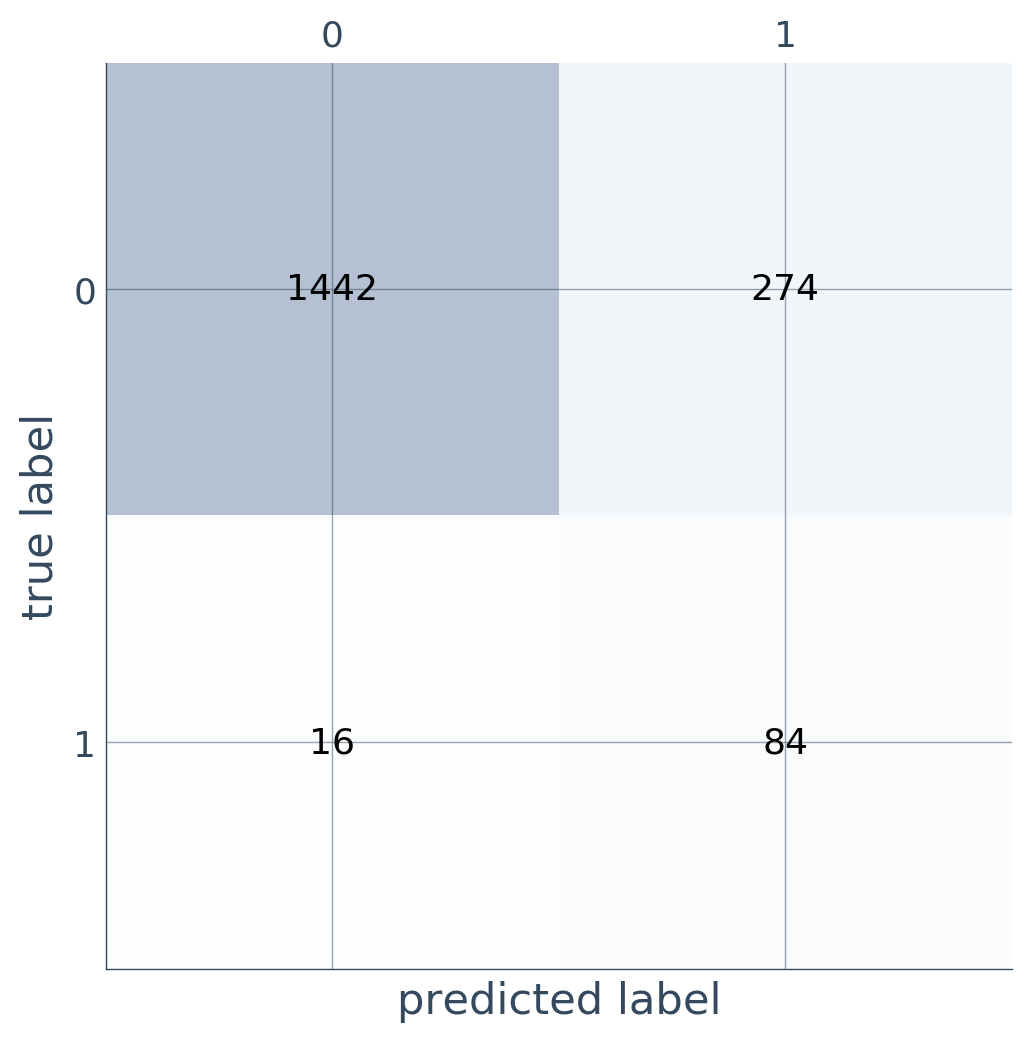

In [9]:
# imports
from sklearn.linear_model import LogisticRegression

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate & fit model
model = LogisticRegression(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = model.predict(X_test)

# score predictions
accuracy = model.score(X_test, y_test)
print('Logistic Regression Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Logistic Regression - Tuning

Best penalty: l2
Best C: 0.01
Tuned Accuracy:	0.8343

             precision    recall  f1-score   support

      False       0.99      0.83      0.90      1716
       True       0.23      0.87      0.37       100

avg / total       0.95      0.83      0.88      1816



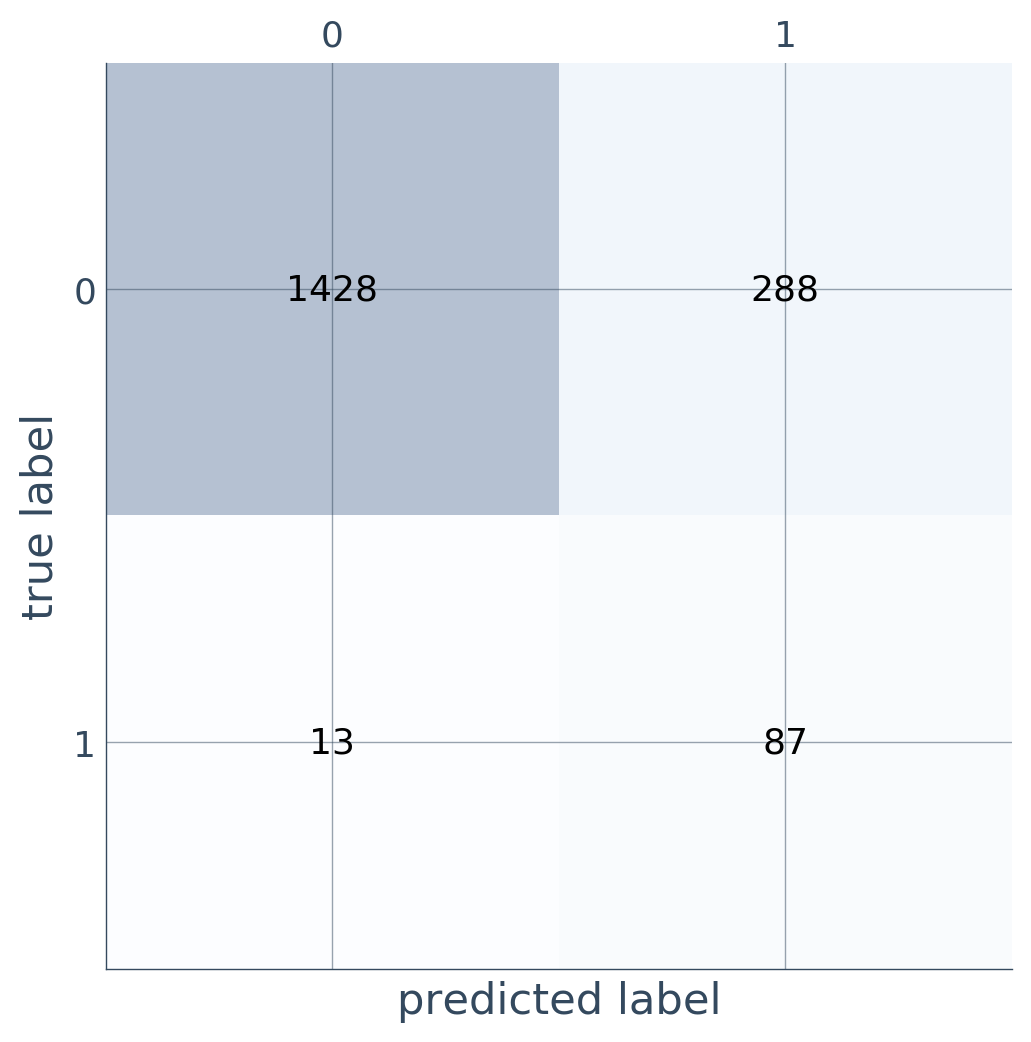

In [10]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = LogisticRegression()

# create a params dict
penalty = ['l1', 'l2']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparameters = dict(C = C, penalty = penalty)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train_sm, y_train_sm)

# print the best hyperparameters
best_penalty = best_model.best_estimator_.get_params()['penalty']
best_C = best_model.best_estimator_.get_params()['C']
print('Best penalty: {}'.format(best_penalty))
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LogisticRegression(C = best_C, penalty = best_penalty)
tuned_model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## LinearSVC

Accuracy: 0.8403
             precision    recall  f1-score   support

      False       0.99      0.84      0.91      1716
       True       0.24      0.86      0.37       100

avg / total       0.95      0.84      0.88      1816



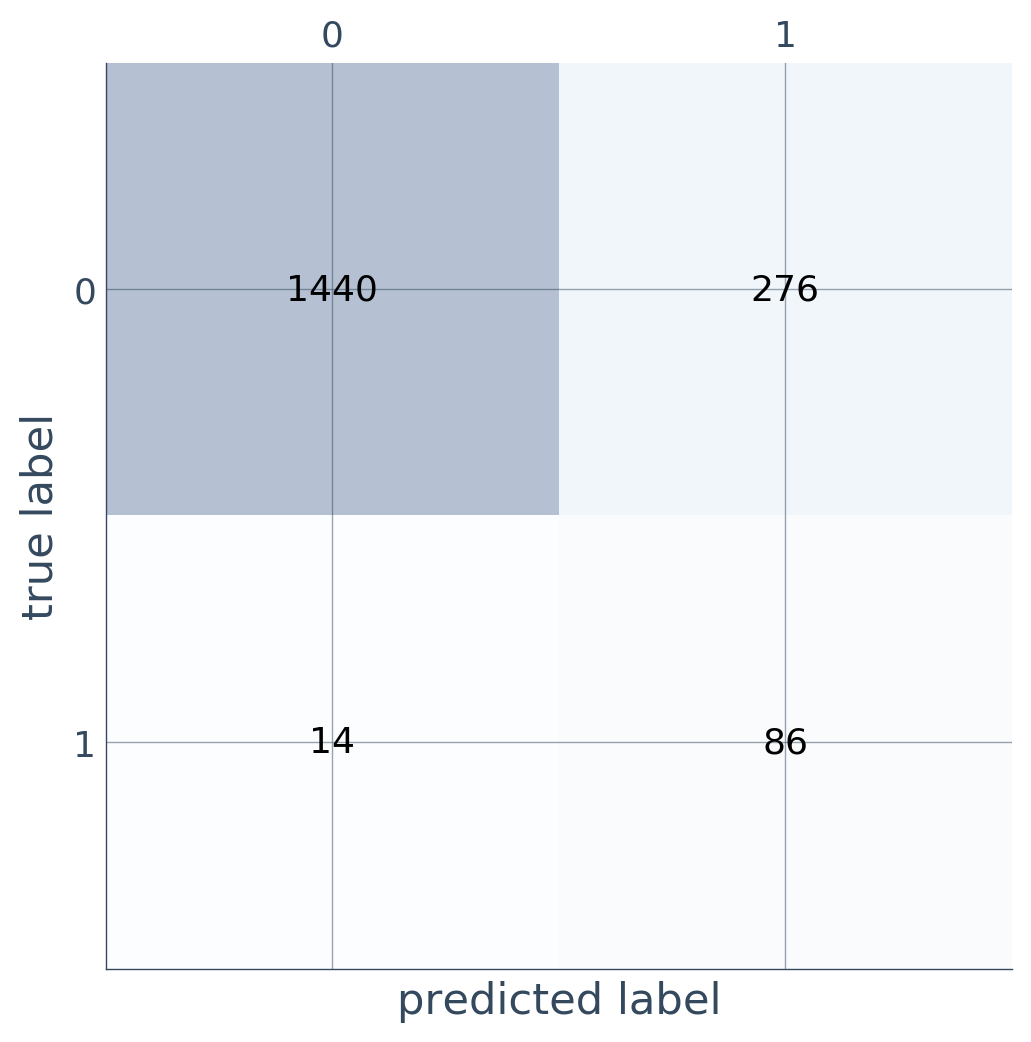

In [11]:
#imports
from sklearn.svm import LinearSVC

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate and fit the learning algorithm
model = LinearSVC(random_state=SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### LinearSVC - Tuning

Best C: 1
Tuned Accuracy:	0.8431

             precision    recall  f1-score   support

      False       0.99      0.84      0.91      1716
       True       0.24      0.86      0.38       100

avg / total       0.95      0.84      0.88      1816



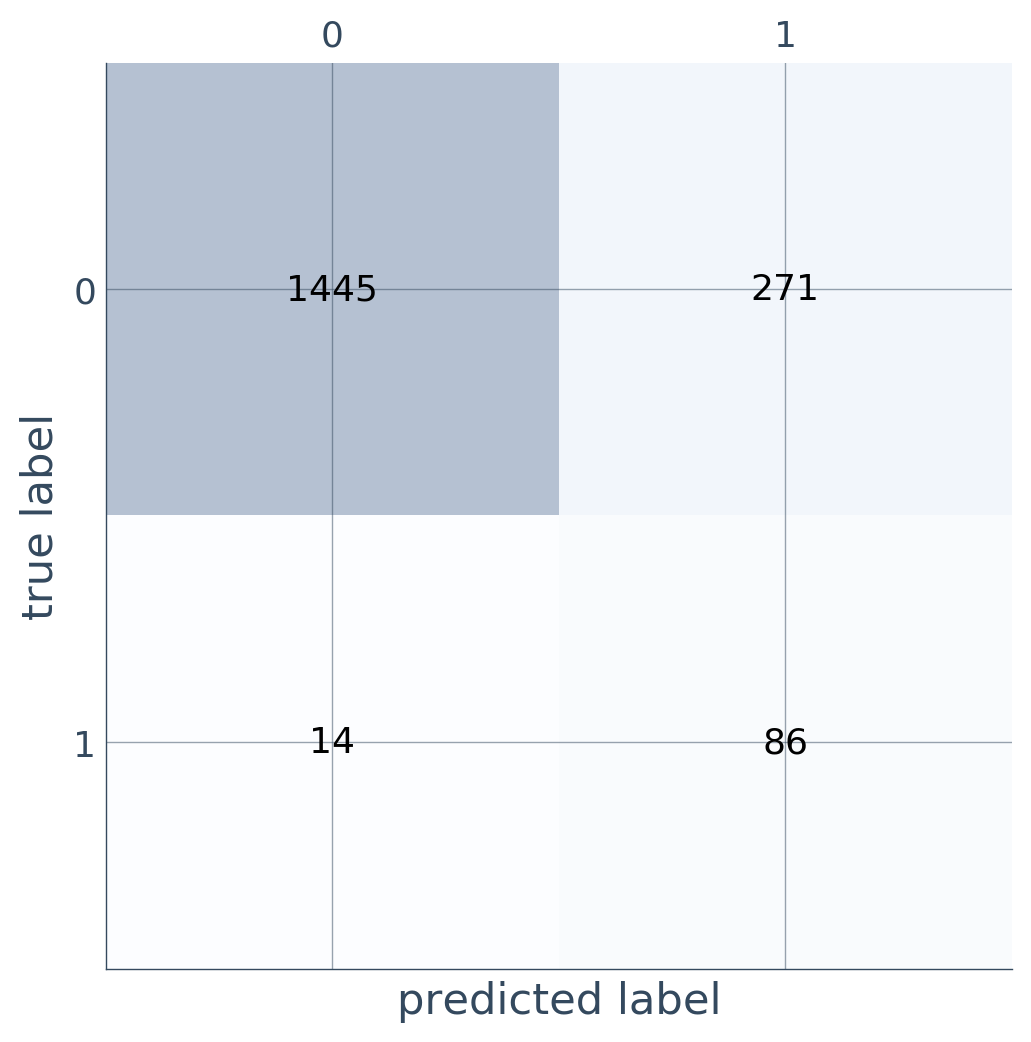

In [12]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate and fit the learning algorithm
model = LinearSVC(random_state=SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = model.predict(X_test)

# create a params dict
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparameters = dict(C = C)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train_sm, y_train_sm)

# print the best hyperparameters
best_C = best_model.best_estimator_.get_params()['C']
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LinearSVC(C = best_C)
tuned_model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## SVC

Accuracy: 0.8431
             precision    recall  f1-score   support

      False       0.99      0.84      0.91      1716
       True       0.24      0.86      0.38       100

avg / total       0.95      0.84      0.88      1816



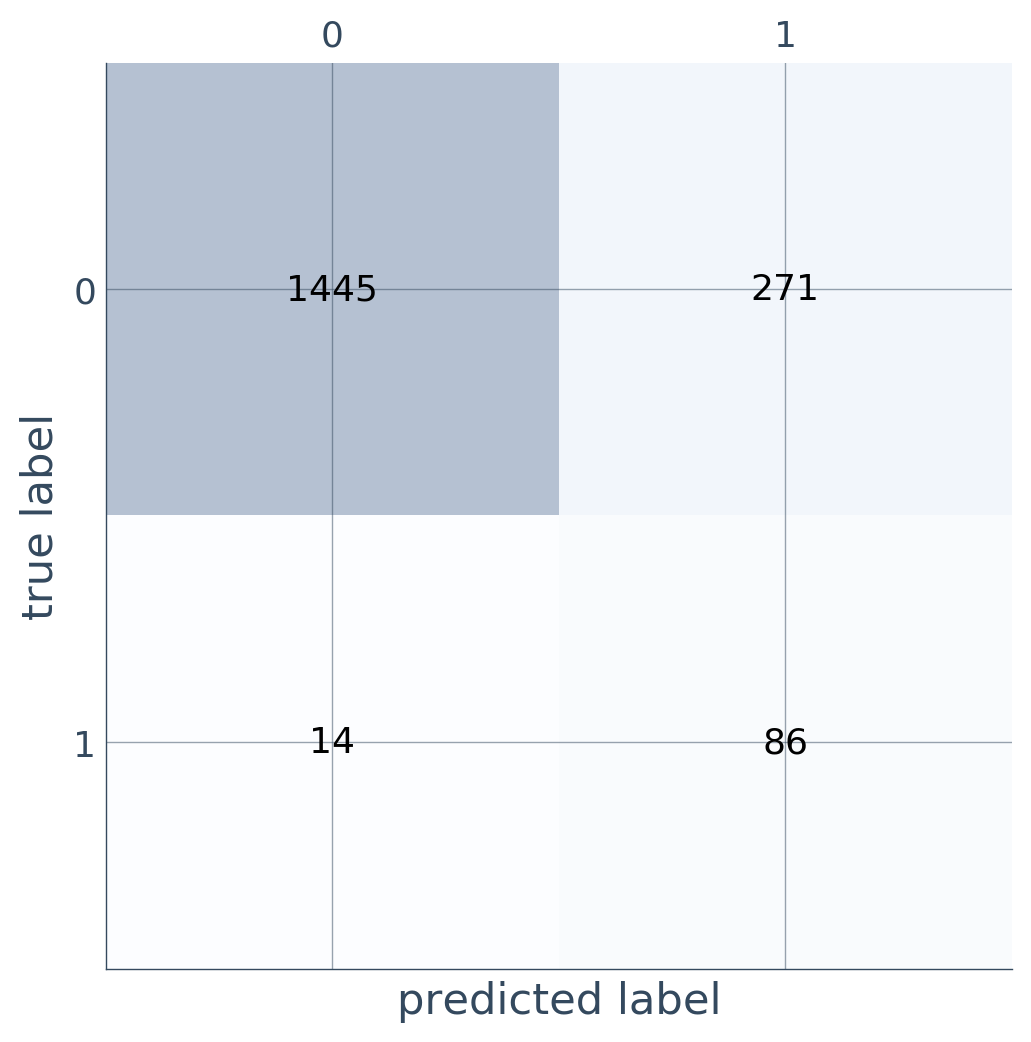

In [13]:
from sklearn.svm import SVC

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = SVC(random_state = SEED)

# create a params dict
model.fit(X_train_sm, y_train_sm)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Tuning SVC

Best gamma: 0.1
Best C: 150
Accuracy: 0.9334
             precision    recall  f1-score   support

      False       0.95      0.98      0.97      1716
       True       0.24      0.10      0.14       100

avg / total       0.91      0.93      0.92      1816



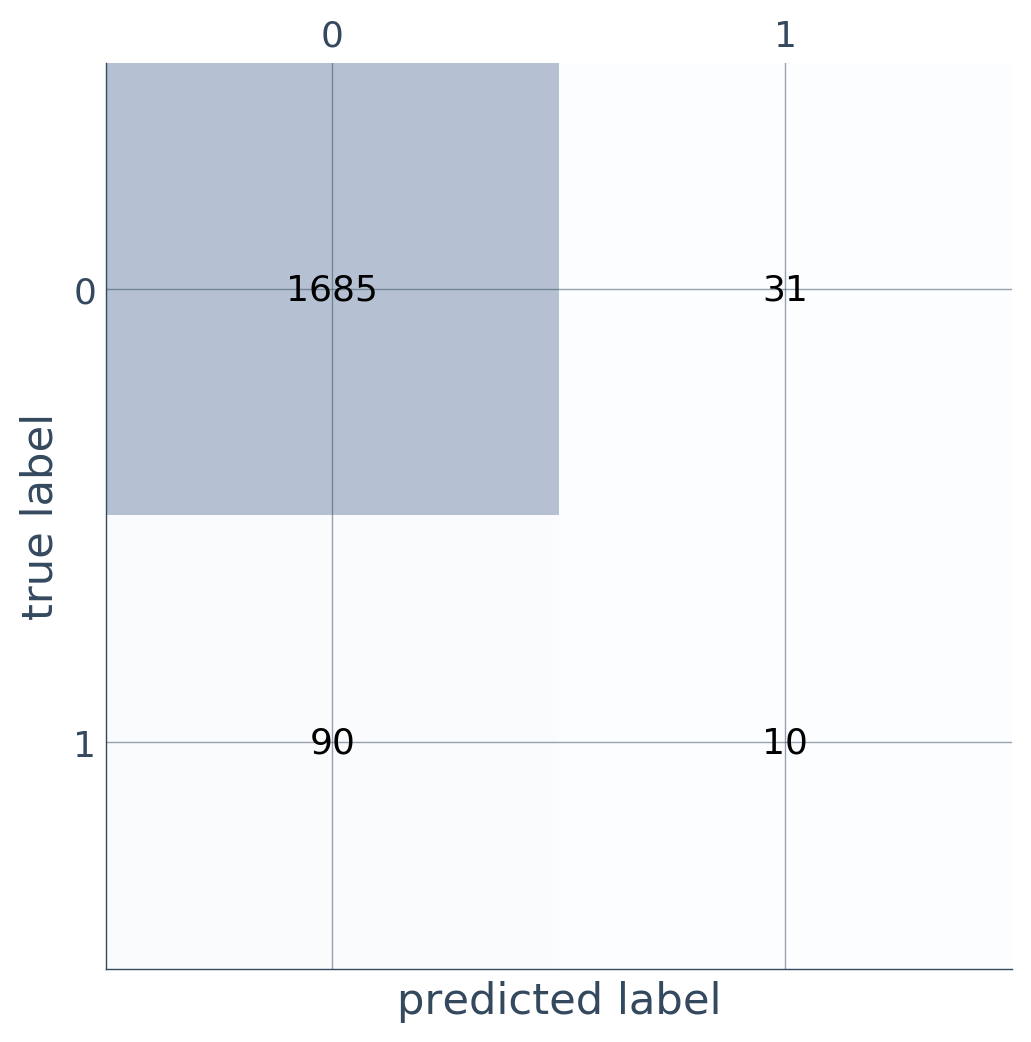

In [14]:
from sklearn.svm import SVC

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = SVC(random_state = SEED)

# create a params dict
C = [1, 50, 100, 150, 200]
gamma = [0.001, 0.01, 0.1, 0.5, 1.0]
hyperparameters = dict(C = C, gamma = gamma)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train_sm, y_train_sm)

# print the best hyperparameters
best_gamma = best_model.best_estimator_.get_params()['gamma']
best_C = best_model.best_estimator_.get_params()['C']
print('Best gamma: {}'.format(best_gamma))
print('Best C: {}'.format(best_C))


# BUILD MODEL WITH BEST HYPERPARAMETERS

# instantiate & fit model
model = SVC(gamma = best_gamma, C = best_C, random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## Decision Tree

             precision    recall  f1-score   support

      False       0.96      0.94      0.95      1716
       True       0.20      0.26      0.23       100

avg / total       0.91      0.90      0.91      1816



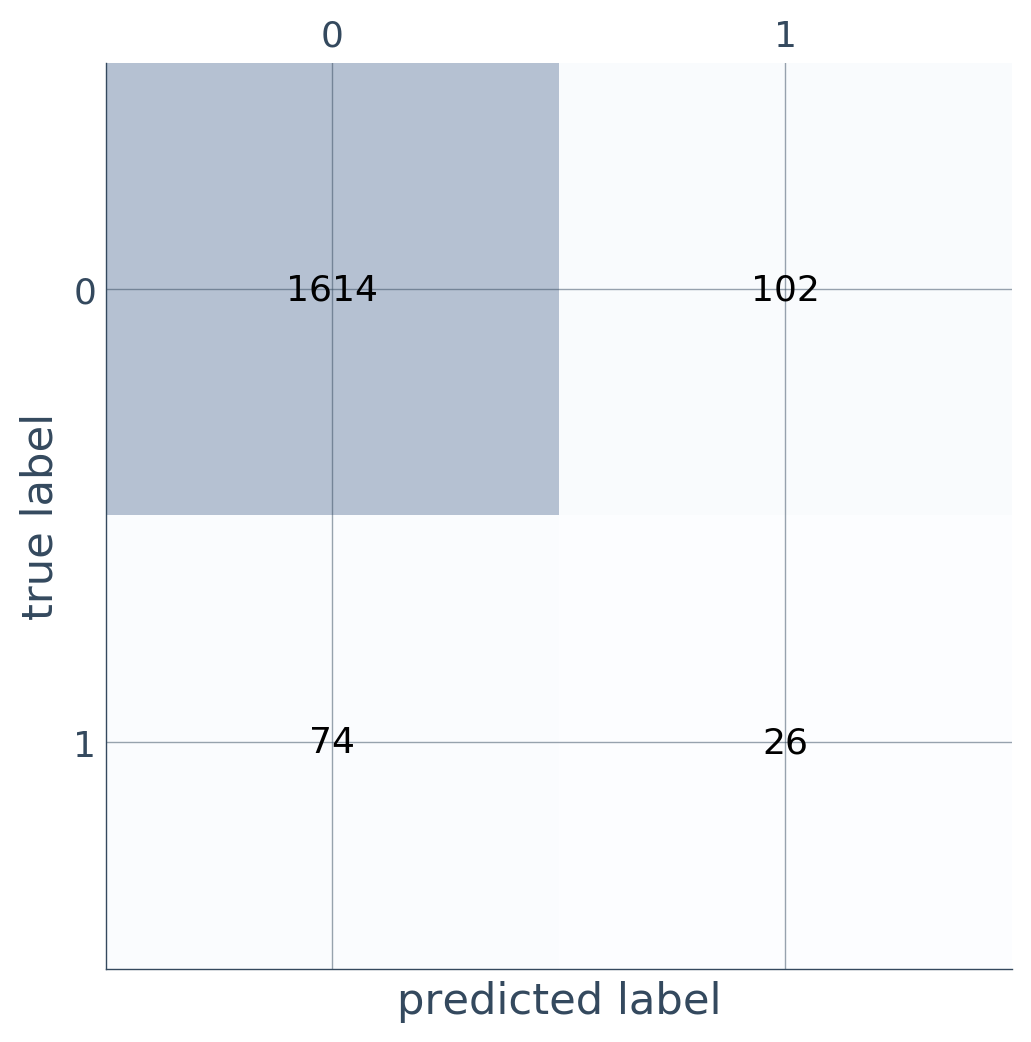

In [15]:
# imports
from sklearn.tree import DecisionTreeClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate & train a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = SEED)
dt.fit(X_train_sm, y_train_sm)

# make predictions
y_pred = dt.predict(X_test)

# SCORING
# accuracy
accuracy_score(y_test, y_pred)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Decision Tree - Tuning

Best max_depth: 10
Best min_samples_leaf: 0.01
Tuned Decision Tree Accuracy:	0.8876651982378855
             precision    recall  f1-score   support

      False       0.97      0.91      0.94      1716
       True       0.24      0.47      0.32       100

avg / total       0.93      0.89      0.90      1816



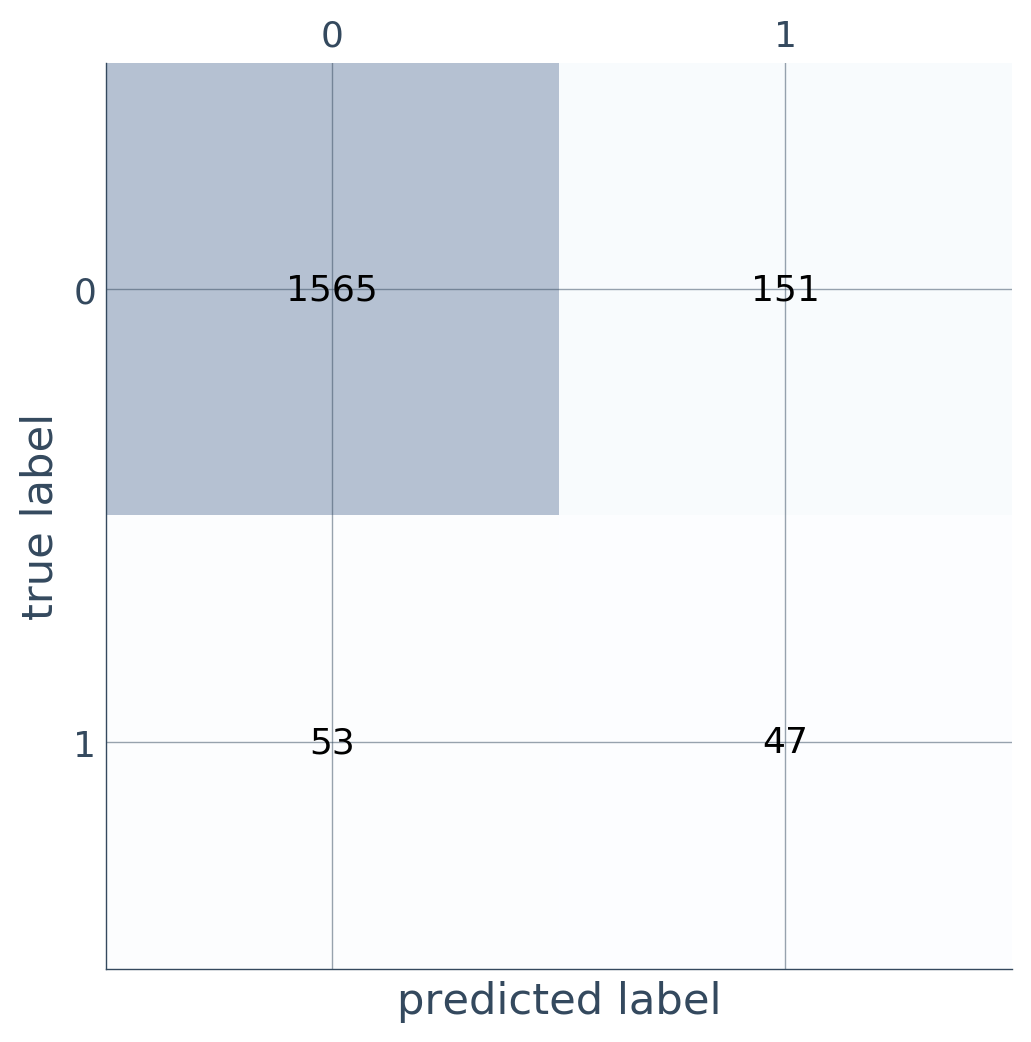

In [16]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = DecisionTreeClassifier()

# create a params dict
depth = [2, 3, 4, 5, 6, 10, 15, 20]
min_samples = [.01, .025, .05, .075, .1, .2]
hyperparameters = dict(max_depth = depth, min_samples_leaf = min_samples)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train_sm, y_train_sm)

# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))


# RUN MODEL WITH BEST HYPERPARAMETERS

# instantiate a DecisionTreeClassifier
tuned_model = DecisionTreeClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     random_state = SEED)

# train the model
tuned_model.fit(X_train_sm, y_train_sm)

# make predictions
y_pred = tuned_model.predict(X_test)

# score accuracy
tuned_model_accuracy = accuracy_score(y_test, y_pred)
print('Tuned Decision Tree Accuracy:\t{}'.format(tuned_model_accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## Random Forest

             precision    recall  f1-score   support

      False       0.95      0.98      0.96      1716
       True       0.24      0.13      0.17       100

avg / total       0.91      0.93      0.92      1816



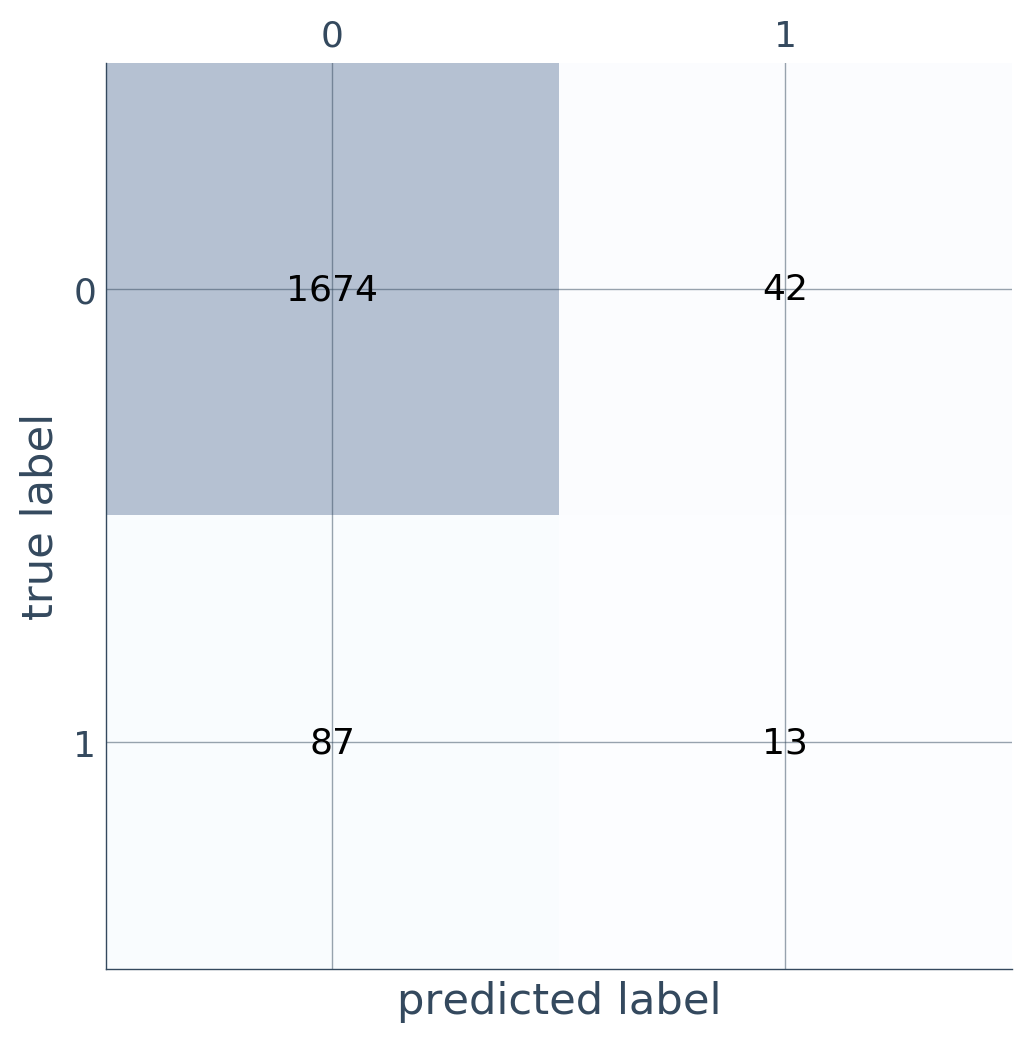

In [17]:
from sklearn.ensemble import RandomForestClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate & fit
model = RandomForestClassifier(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on the test set
y_pred = model.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

### Random Forest - Tuning

In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate the learning algorithm
model = RandomForestClassifier(random_state = SEED)

# create a params dict
depth = [2, 3, 4, 5, 6, 10, 15, 20]
min_samples = [.01, .025, .05, .075, .1, .2]
est = [5, 10, 50, 100, 500]
hyperparameters = dict(max_depth = depth, 
                       min_samples_leaf = min_samples,
                       n_estimators = est)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train_sm, y_train_sm)

# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
best_est = best_model.best_estimator_.get_params()['n_estimators']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))
print('Best n_estimators: {}'.format(best_est))


# BUILD MODEL WITH BEST HYPERPARAMETERS

# instantiate a RandomForestClassifier
tuned_model = RandomForestClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     n_estimators = best_est,
                                     random_state = SEED)

# train the model
tuned_model.fit(X_train_sm, y_train_sm)

# make predictions
tuned_model_y_pred = tuned_model.predict(X_test)

# SCORING
# accuracy
accuracy_score(y_test, tuned_model_y_pred)

# classification report
print(classification_report(y_test, tuned_model_y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = tuned_model_y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

## Voting Classifier

In [ ]:
# Imports
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate individual classifiers
lr = LogisticRegression(penalty = 'l1', 
                        C = 0.00001, 
                        random_state = SEED)
svc = SVC(C = 50,
          gamma = 0.5,
          random_state = SEED)

knn = KNN()

rf = RandomForestClassifier(max_depth = 15,
                           min_samples_leaf = 0.01,
                           n_estimators = 100,
                           random_state = SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('SVM', svc),
               ('KNN', knn),
               ('Random Forest', rf)]

print('PRECISION')
# iterate over the defined list of tuples containing the classifiers 
for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train_sm, y_train_sm)
    
    # predict the labels of the test set
    y_pred = clf.predict(X_test);
    
    # evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, precision_score(y_test, y_pred)))
    
# instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# fit 'vc' to the training set
vc.fit(X_train_sm, y_train_sm)

# predict test set labels
y_pred = vc.predict(X_test)

# SCORING
# accuracy
accuracy_score(y_test, y_pred)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=10, 
                            min_samples_leaf=0.01, 
                            random_state=SEED)

# instantiate & fit a Bagging Classifier
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=300, 
                       n_jobs=-1)
bc.fit(X_train_sm, y_train_sm)

# make predictions on the test set
y_pred = bc.predict(X_test)

# SCORING
# accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}%'.format(acc * 100))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

## AdaBoost

In [ ]:
#imports
from sklearn.ensemble import AdaBoostClassifier

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate a Decision Tree
dt = DecisionTreeClassifier(max_depth = 2,
                            random_state=SEED)

# instantate and fit an AdaBoost Classifier
adb_clf = AdaBoostClassifier(base_estimator = dt, 
                             n_estimators = 500,
                             random_state = SEED)
adb_clf.fit(X_train_sm, y_train_sm)

# make predictions on the test set
y_pred = adb_clf.predict(X_test)

# score accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}%'.format(acc * 100))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# instantiate and train Gaussian Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train_sm, y_train_sm)

# make predictions on test features
y_pred = model.predict(X_test)

# score accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}%'.format(acc * 100))

print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

## XGBoost

In [ ]:
#imports
import xgboost as xgb

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')


# instantiate and fit an XGBoost Classifier
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions on the test set
y_pred = model.predict(X_test)

# score accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}%'.format(acc * 100))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

### XGBoost - KFold CV

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')


# instantiate the model
model = xgb.XGBClassifier()

# instantiate KFoldCV
kfold = KFold(n_splits = 10, random_state = SEED)

# score and print results
results = cross_val_score(model, X_train_sm, y_train_sm, cv = kfold)
print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

model.fit(X_train_sm, y_train_sm)

# plot feature importance
xgb.plot_importance(model)

# make predictions on the test set
y_pred = model.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

### Feature Selection Using XGBoost Feature Importance

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')

# instantiate and fit a model
model = xgb.XGBClassifier(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm)
    
    # train model
    selection_model = xgb.XGBClassifier(random_state = SEED)
    selection_model.fit(select_X_train, y_train_sm)
    
    # transform X_test to match selection
    select_X_test = selection.transform(X_test)
    
    # make predictions using transformed test feature matrix
    y_pred = selection_model.predict(select_X_test)
    
    # score performance
    precision = precision_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Precision: %.2f%%" % (thresh, select_X_train.shape[1], precision*100.0));
    
    print(classification_report(y_test, y_pred))


Thresh=0.028, n=15, Precision: 34.38%
             precision    recall  f1-score   support

      False       0.96      0.96      0.96      1716
       True       0.34      0.33      0.34       100

avg / total       0.93      0.93      0.93      1816

### Use Feature-Selected X_train with GridSearch

In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')

print(X_train_sm.shape)
print(y_train_sm.sum())

# instantiate and fit a model
model = xgb.XGBClassifier(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)

# score precision
precision = precision_score(y_test, y_pred)
print("Precision using all features: %.2f%%" % (precision * 100.0))

# classification report
print(classification_report(y_test, y_pred))

# select features using threshold
selection = SelectFromModel(model, threshold=0.028, prefit=True)

# transform training feature set
select_X_train = selection.transform(X_train_sm)

print(select_X_train.shape)

# instantiate the model
selection_model = xgb.XGBClassifier(random_state = SEED)

# fit the model to selected features
selection_model.fit(select_X_train, y_train_sm)
    
# select test features
select_X_test = selection.transform(X_test)

# make predictions using selected features of test set
y_pred = selection_model.predict(select_X_test)

# evaluate the model
precision = precision_score(y_test, y_pred);
print("Precision using selected features: %.2f%%" % (precision*100.0))
print(classification_report(y_test, y_pred));

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted')
plt.ylabel('actual');

### XGBoost - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .3, random_state = SEED)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = SEED)

random_search = RandomizedSearchCV(xgb, 
                                   param_distributions = params,
                                   n_iter = param_comb,
                                   scoring = 'roc_auc',
                                   n_jobs = 4,
                                   cv = skf.split(X,y),
                                   verbose = 3,
                                   random_state=SEED )

random_search.fit(X_sm, y_sm)

In [ ]:
#imports
import xgboost as xgb
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')

# instantiate and fit a model
model = xgb.XGBClassifier(random_state = SEED)
model.fit(X_train_sm, y_train_sm)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)

# score accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_sm)
    
    # train model
    selection_model = xgb.XGBClassifier(random_state = SEED)
    selection_model.fit(select_X_train, y_train_sm)
    
    # transform X_test to match selection
    select_X_test = selection.transform(X_test)
    
    # make predictions using transformed test feature matrix
    y_pred = selection_model.predict(select_X_test)
    
    # score performance
    accuracy = accuracy_score(y_test, y_pred);
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0));
    print(classification_report(y_test, y_pred))

In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# SMOTE oversampling
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

# create dmatrix
dback_dmatrix = xgb.DMatrix(data = X_sm, label = y_sm)

# create the param grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 0.9],
    'n_estimators': [200, 400, 800],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.3, 0.5, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# instantiate the model
model = xgb.XGBClassifier()

# configure GridSearchCV
grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    scoring = 'roc_auc', 
                    cv = 4, 
                    verbose = 1)

# fit 
grid.fit(X_sm, y_sm)

print("Best parameters found: ", grid.best_params_)


In [ ]:
# load data
df = pd.read_csv(test_file_url, index_col = 0)

# split
X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# create dmatrix
dback_dmatrix = xgb.DMatrix(data=X,label=y)


# instantiate the model
model = xgb.XGBClassifier(learning_rate = 0.1, 
                          n_estimators = 800, 
                          max_depth = 5, 
                          subsample = 0.3, 
                          colsample_bytree = 0.6, 
                          random_state = SEED)


# fit 
model.fit(X, y)

# SCORE
#accuracy
model.score(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')



# create dmatrix
dback_dmatrix = xgb.DMatrix(data = X_train_sm, label = y_train_sm)

# create the param grid
param_grid = {
    'n_estimators': [1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9],
    'subsample': [0.25, 0.5, 0.75, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
#     'min_child_weight': 
    'max_depth': [4, 6, 8, 10],
    'gamma': [0]
}

# instantiate the model
model = xgb.XGBClassifier()

# configure GridSearchCV
grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    scoring = 'roc_auc', 
                    cv = 4, 
                    verbose = 1
                   )

# fit 
grid.fit(X_train_sm, y_train_sm)

print("Best parameters found: ",grid.best_params_)


## BEST XGBOOST MODEL

In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# rename columns for XGBoost
values = X_train.columns.tolist()
X_train_sm = pd.DataFrame(X_train_sm)
keys = X_train_sm.columns.tolist() 
new_cols_dict = dict(zip(keys, values))
X_train_sm = X_train_sm.rename(new_cols_dict, axis = 'columns')

# create dmatrix
dback_dmatrix = xgb.DMatrix(data = X_train_sm, label = y_train_sm)


# instantiate the model
model = xgb.XGBClassifier(learning_rate = 0.01,
                          n_estimators = 1000,
                          max_depth = 10,
                          subsample = 0.75,
                          colsample_bytree = 1.0, 
                          gamma = 0,
                          random_state = SEED)


# fit 
model.fit(X_train_sm, y_train_sm)

# SCORE
#accuracy
model.score(X_test, y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


## Neural Network

In [ ]:
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# set random seed
np.random.seed(42)

# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

# number of features
number_of_features = 27

# create function returning a compiled network
def create_network(optimizer = 'rmsprop'):
    
    # start neural network
    network = models.Sequential()
    
    # add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units = 16,
                            activation = 'relu',
                            input_shape = (number_of_features,)))
    
    # add fully connected layer with a signmoid activation function
    network.add(layers.Dense(units = 1, activation = 'sigmoid'))
    
    # compile neural network
    network.compile(loss = 'binary_crossentropy',
                   optimizer = optimizer,
                   metrics = ['accuracy'])
    
    # return compiled network
    return network

# wrap Keras model so it can be used by sklearn
neural_network = KerasClassifier(build_fn = create_network, verbose = 0)

# create hyperparameters
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

# create hyperparameter options
hyperparameters = dict(optimizer = optimizers, epochs = epochs, batch_size = batches)

# create grid search
grid = GridSearchCV(estimator = neural_network, param_grid = hyperparameters)

# fit grid search
grid_result = grid.fit(X_sm, y_sm)

# best hyperparameters
grid_result.best_estimator_
grid_result.best_score_
grid_result.best_params_

In [ ]:
# import data and split into features matrix and target vector
df = pd.read_csv(test_file_url, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# SMOTE IT!
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

# number of features
number_of_features = 27

# instantiate and fit a neural_network
tuned_nn = KerasClassifier(build_fn = create_network, verbose = 0)
tuned_nn.fit(X_train_sm,
            y_train_sm,
            epochs = 10,
            verbose = 1,
            batch_size = 5,
            validation_data = (X_test, y_test))

y_pred = tuned_nn.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');